### CAUSAL INFERENCE ASSIGNMENT

# **Question 1/5:  DEBUGGING**

*(1) Debugging--in the 3 cases below (A through C), identify the major 	coding error in each case and explain how to fix it, in 1-2 sentences. DO NOT actually copy/paste corrected code:*







```
#### Part A
treat = ...
#X = ...

genout <- GenMatch(Tr=treat, X=X)

summary(genout)

mb <- MatchBalance(treat~age +educ+black+ hisp+ married+ nodegr+ u74 + 
                            +u75 + re75+ re74 + I(re74*re75) + re78, 
                            match.out=genout, nboots=500)

mout <- Match(Y=Y, Tr=treat, X=X, Weight.matrix=genout)

```



**Answer**: 
The mistake is at match.out=genout, because we are passing on the optimal weights 
rather than the matched variables. It should be match.out=mout.

```
#### Part B
#X=...
#treat=...

genout <- GenMatch(Tr=treat, X=X, estimand="ATT", caliper = 0.25,
                   pop.size=16, max.generations=10, wait.generations=1)

mout <- Match(Y=Y, Tr=treat, X=X, Weight.matrix=genout)

summary(mout)

mb <- MatchBalance(treat~age +educ+black+ hisp+ married+ nodegr
                    +u74+ u75+ re75+ re74+ I(re74*re75), 
                    match.out=mout, nboots=500)
```

**Answer:** The problem is that the arguments passed in GenMatch are not identical with the arguments passes on Match. To solve this, we pass arguments in Match accordingly with GenMatch.

---




```
#### Part C
#X=...
#treat=...

genout <- GenMatch(Tr=treat, X=X)

Y=re78

mout <- Match(Y=Y, Tr=treat, X=X, Weight.matrix=genout)

summary(mout)

mb <- MatchBalance(treat ~ age+educ+black+ hisp+ married+ 
                nodegr+ u74+ u75+ re75+ re74+ I(re74*re75)+re78,
                match.out=mout, nboots=500)
```
                


**Answer:**  The issue with this code is that one of the variables in MatchBalance is the outcome variable (re78). MatchBalance should only have the covariates.

#**Questions 2/5: REPLICATION**
Question 2-5 below require the peacekeeping data set that we worked on in class, as well as this codebook (see the appendix):**
http://web.worldbank.org/archive/website01241/WEB/IMAGES/INTERNAT.PDF

**The class breakout instructions (including data download code) are here:**
https://gist.github.com/diamonaj/3795bfc2e6349d00aa0ccfe14102858d


(2) Replicate the analysis done to produce figure 8 in https://gking.harvard.edu/files/counterf.pdf  -- EXCEPT instead of the original interaction term, add two other interaction terms: (exp*untype4) and (wardur*logcost). 

Show the marginal effects of UN peacekeeping as a function of war duration, as in the original figure.




Your answer should include your properly-labelled figure and answers to the following questions:

1.   What do the variables used in the two axes mean? 
2.   What claim was supported by showing Figure 8 in the article? [Max. 2 sentences]
3. Is this claim also supported by your figure? Explain using specific details of your figure [Max. 3 sentences]

A few suggestions:

Read the class breakout instructions above to get the data and relevant columns;
	
If you are not clear on the model, read the relevant sections of the paper and focus on understanding Table 2;
	
To plot the figure, you should use a strategy similar to the one we used in the statistics scavenger hunt, which was also used in a previous assignment (e.g., holding predictors at their means and looping through values of one variable to obtain treatment effects at different levels of the variable--you may want to review the answer key for that previous assignment.


In [0]:
install.packages ("Matching")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(Matching)

In [0]:
foo <- read.csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00086677-3767/peace.csv")

In [0]:
foo <- foo[, c(6:8, 11:16, 99, 50, 114, 49, 63, 136, 109, 126, 48, 160, 142, 10, 108)]

In [0]:
foo <- foo[c(-19, -47), ]

In [0]:
which(is.na(foo)==TRUE)

integer(0)

In [0]:
head(foo)

clust2,cname,yrbeg,geo,royal,euro,lac,mideast,asia,pbs2s3,⋯,wardur,factnum,factnum2,trnsfcap,untype4,treaty,develop,exp,decade,logdead
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
AFG,Afghanistan-Taliban,93,3,0,0,0,1,1,0,⋯,72,4,16,5.735545,0,0,132.8466,0.1217277,5,9.210340
AFG,Afghanistan,78,3,0,0,0,1,1,0,⋯,168,6,36,9.730863,0,0,132.0000,0.1163292,4,13.997832
MEX,Mexico,92,2,0,0,1,0,0,1,⋯,24,2,4,12.626026,0,0,1533.0000,0.0610000,5,6.907755
FSU,Russia-Chechnya,94,1,0,1,0,0,0,0,⋯,24,2,4,-112.000000,0,1,2216.6079,0.1294513,5,10.308952
THA,Thailand-Commun.,67,4,0,0,0,0,1,1,⋯,216,2,4,4.275317,0,0,1295.0000,0.1420000,3,9.210340
CHD,Chad,65,5,0,0,0,0,0,0,⋯,168,11,121,25.989912,0,1,10.0000,0.0900000,3,10.819778


In [0]:
glm1 <- glm(pbs2s3 ~ wartype + logdead + wardur + factnum + factnum2 + 
            trnsfcap + develop + exp + decade + treaty + untype4, 
            data = foo, family = binomial)

In [0]:
glm2 <- glm(pbs2s3 ~ wartype + logdead + wardur + factnum + factnum2 + 
              trnsfcap + develop + exp + decade + treaty + untype4 +
              untype4:exp + wardur:logcost, data = foo, family = binomial)

In [0]:
glm3 <- glm(pbs2s3 ~ wartype + logdead + wardur + factnum + factnum2 + 
              trnsfcap + develop + exp + decade + treaty + untype4 +
              + untype4:wardur, data = foo, family = binomial)

In [0]:
# Predictors at their means
mean.wartype <- mean(foo$wartype)
mean.logdead <- mean(foo$logdead)
mean.logcost <- mean(foo$logcost)
mean.wardur <- mean (foo$wardur)
mean.factnum <- mean(foo$factnum)
mean.factnum2 <- mean(foo$factnum2)
mean.trnsfcap <- mean(foo$trnsfcap)
mean.develop <- mean(foo$develop)
mean.exp <- mean(foo$exp)
mean.decade <- mean(foo$decade)
mean.treaty <- mean(foo$treaty)

In [0]:
get_logit <- function (X, coef) {
    logit <- coef[1] + sum(coef[2:length(coef)]*X)
    return (exp(logit)/(1+exp(logit)))
}
storage.original.treat <- rep(NA, 315)
storage.original.control <- rep(NA, 315)

In [0]:
# For each war duration
for (wardur in 1:315) {
  
  # Hypothetical unit with predictors held at their means, for both
  # treatment and control group, and varying wardur.
  X.treat <- c(mean.wartype,  mean.logdead, wardur, mean.factnum, mean.factnum2, 
               mean.trnsfcap, mean.develop, mean.exp, mean.decade, mean.treaty,1)
  X.control <- c(mean.wartype, mean.logdead, wardur, mean.factnum, mean.factnum2, 
                 mean.trnsfcap, mean.develop, mean.exp, mean.decade, mean.treaty, 0)
  
  storage.original.treat[wardur]  <- get_logit(X.treat, coef(glm1))
  storage.original.control[wardur]  <- get_logit(X.control, coef(glm1))
}

In [0]:
# Marginal treatment effect is y_treat - y_control
original_y <- storage.original.treat - storage.original.control

# Same process, but for logdead model
storage.gary.treat <- rep(NA, 315)
storage.gary.control <- rep(NA, 315)
for (wardur in 1:315) {
  gary.treat <- c(mean.wartype, mean.logdead, wardur, mean.factnum, mean.factnum2, 
               mean.trnsfcap, mean.develop, mean.exp, mean.decade, mean.treaty,1,  1*wardur)
  gary.control <- c(mean.wartype, mean.logdead, wardur, mean.factnum, mean.factnum2, 
                 mean.trnsfcap, mean.develop, mean.exp, mean.decade, mean.treaty, 0, 0*wardur)
  storage.gary.treat[wardur]  <- get_logit(gary.treat, coef(glm3))
  storage.gary.control[wardur]  <- get_logit(gary.control, coef(glm3))
}
gary_y <- storage.gary.treat - storage.gary.control

In [0]:
# Marginal treatment effect is y_treat - y_control
logdead_y <- storage.original.treat - storage.original.control

# Same process, but for logdead model
storage.logdead.treat <- rep(NA, 315)
storage.logdead.control <- rep(NA, 315)
for (wardur in 1:315) {
  X.treat <- c(mean.wartype, mean.logdead, wardur, mean.factnum, mean.factnum2, 
               mean.trnsfcap, mean.develop, mean.exp, mean.decade, mean.treaty, 1, 1*mean.exp, wardur*mean.logcost)
  X.control <- c(mean.wartype,  mean.logdead, wardur, mean.factnum, mean.factnum2, 
                 mean.trnsfcap, mean.develop, mean.exp, mean.decade, mean.treaty ,0,  0*mean.exp, wardur*mean.logcost)
  storage.logdead.treat[wardur]  <- get_logit(X.treat, coef(glm2))
  storage.logdead.control[wardur]  <- get_logit(X.control, coef(glm2))
}
logdead_y <- storage.logdead.treat - storage.logdead.control

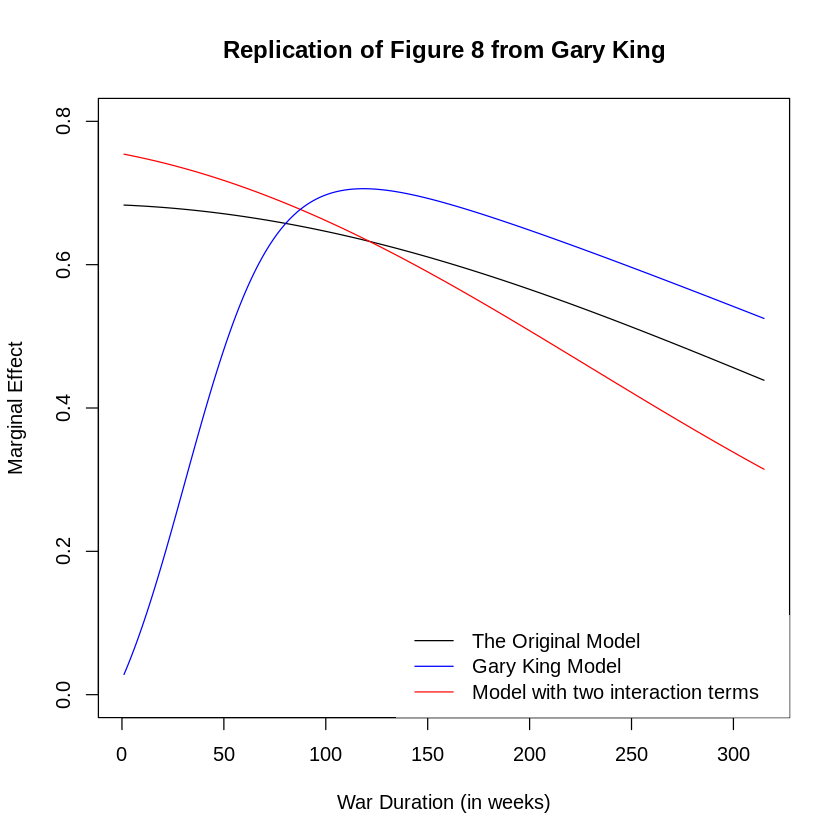

In [0]:
plot(1:315, original_y, type = "l", main="Replication of Figure 8 from Gary King", ylim = c(0, 0.8), xlab="War Duration (in weeks)", ylab="Marginal Effect")
lines(1:315, logdead_y, col = "red", ylim = c(0, 0.8))
lines(1:315, gary_y, col = "blue", ylim = c(0, 0.8))
legend("bottomright", legend=c("The Original Model", "Gary King Model", "Model with two interaction terms"), col=c("black", "blue", "red"), lty=1, box.lty=0)


1. The x-axis is War Duration expressed in months, while the y-axis shows the marginal effect of UN interventions (treat).
2. The original model shows that for the wars that have short duration, the UN intervention has a high marginal effect. Gary King's model shows that for very short wars there is no effect, but as time increases, it shows the same results as the original model.
3. The model I created shows that as the time increases, the UN intervention effect has a smaller marginal effect. We can see this from the slope going downwards. Our model would lead to the same decision as the original model (intervene in short wars), but Gary King's model shows that UN should intervene after a specific amount of time.

# **Question 3/5: DEFINE TREATMENT**

*(3) Define treatment as below:*
```
Tr <- rep(0, length(foo$uncint))
Tr[which(foo$uncint != "None"] <- 1
```

*What does this mean? What is "treatment"?*


**Answer:**

***uncint*** variable stands for *type of UN Intervention* (page 36, handbook). In this case, we are filtering all the observations that have experienced some sort of UN Intervention to be considered as treated, while the treatment is UN Intervention, and the control group is the group that did not receive any UN intervention (None).

# **Question 4/5: CAUSAL QUESTION, SUTVA AND PROPENSITY SCORES**

Let's pretend you work for an NGO and your manager asks you to 	estimate the impact of the treatment identified above on lenient peacebuilding success 2 years and 5 years after the war. You will have to search for these two outcomes variables in the codebook.


*(a) In no more than 1 sentence, articulate the causal question as best you can (being as clear as you can about treatment and control):*


**Answer:**

What is the effect of the intrusive UN Intervention (treatment) in the peacebuilding success 2 years (PBS2L) and 5 years (PBS2L) after the war, compared to the lack of the intrusive UN intervention (control)?

*(b) In no more than 1 sentence, explain how/why SUTVA might be violated here. In no more than 1 additional sentence, explain how you could in theory use the "restrict" argument (in Match()/GenMatch()) to help address this potential problem.*

**Answer:**

SUTVA may be violated if the treatment (UN peacebuilding intervention) applied to one country affects the outcome of the neighbouring countries, due to geographical and circumstantial factors.

We can use restrict() in Match/GenMatch to assure that neighbouring countries do not get matched together (as treatment and control), because, otherwise SUTVA would be violated.

*(c) Use simple logistic regression, propensity score matching, and genetic matching to try to answer these questions.*


For the matching exercises, measure balance on AT LEAST the basic variables we considered in the class exercise. In addition, at least one genetic matching attempt should incorporate propensity scores.

For the genetic matching exercise, population size should be at least 200 and you should run it for at least 25 generations (which may require you to modify the number of non-changing generations). When performing genetic matching, take a little time to try different approaches to producing excellent balance. You can tweak the values of "M", you can do caliper matching, you can match on quadratic and/or interaction terms, you can attempt exact matching, etc.

JUST ONE WORD OF ADVICE: The precise way you run GenMatch is how you have to run Match. For example, if you run GenMatch with M = 2 and X includes interaction terms etc., then in the next line of code you have to run Match exactly the same way (using the GenMatch output as the weight.matrix). Then in the next line you run MatchBalance, using the Match output.

Match with replacement and allow ties. ATT makes sense here. Ideally, you would measure/optimize balance on the interaction terms and quadratic terms as well (but this will make things a bit harder than simply balancing on the basic variables). 


Your final answer should include:

(i) a table like this one--the caption below the table should include the asterisked footnote AS WELL AS **the functional forms of the propensity score model, **the variables you've genetically matched on, and **the MatchBalance variables used for genetic matching:

******TABLE FORMAT******* (Please give it a title)
				Tmt effect    Tmt effect       p-value
                      estimate     std error   (from MatchBalance)        

logistic regression
len success 2 years 		                
len success 5 years 		                

p- score matching	  	
len success 2 years 	 	*
len success 5 years 		*

gen match
len success 2 years 		*
len success 5 years 		*
  
gen match with propensity scores
len success 2 years 		*
len success 5 years 		*

*Only provide a treatment effect for matching results if your leximin p-value is above 0.10. Otherwise write in "NA".

(ii) A short discussion of your matching strategy and attempts. What were some unsuccessful attempts? How did you go about choosing covariates? [Max. 5 sentences]


In [0]:
if (!require("devtools")) install.packages("devtools")
devtools::install_github("JasjeetSekhon/rgenoud", force= TRUE)

Loading required package: devtools
Loading required package: usethis


✔  checking for file ‘/tmp/RtmpETMcLJ/remotes831e030fe4/JasjeetSekhon-rgenoud-52ccc36/DESCRIPTION’
─  preparing ‘rgenoud’:
✔  checking DESCRIPTION meta-information
─  cleaning src
✔  checking whether ‘INDEX’ is up-to-date
✔  checking vignette meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘rgenoud_5.8-3.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
# Reload the data
foo <- read.csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00086677-3767/peace.csv")
foo <- foo[c(-19, -47), ]
Tr <- rep(0, length(foo$uncint))
Tr[which(foo$uncint != "None")] <- 1
foo$Tr <- Tr
library(Matching)

# Balance before matching (for the logistic regression model)
mb1 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, nboots=500)

# TWo years
glm4 <- glm(pbs2l ~ wartype + logdead + wardur + factnum + factnum2 + 
              trnsfcap + develop + exp + decade + treaty + Tr, 
            data = foo, family = binomial)
summary(glm4)

# Five years
summary(foo$pbs5l)      # Check for NAs
NAs <- is.na(foo$pbs5l) # NA indices
glm5 <- glm(pbs5l ~ wartype + logdead + wardur + factnum + factnum2 + 
              trnsfcap + develop + exp + decade + treaty + Tr, 
            data = foo[!NAs,], family = binomial)
summary(glm5)

# For this question, it is sufficient to simply input the coefficient
# in the table. However, this is *not* the treatment effect because
# of the logistic function. If you were to actually calculate the treatment
# effect in this model, you would have to pose some additional assumptions.
# For example, you could consider the treatment effect the average of
# unit-level different in outcomes, where you use the model to simulate
# the counterfactual. Again, this was not necessary but is the technically
# correct response.





***** (V1) wartype *****
before matching:
mean treatment........ 0.63889 
mean control.......... 0.63953 
std mean diff......... -0.13261 

mean raw eQQ diff..... 0 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 0 

mean eCDF diff........ 0.000323 
med  eCDF diff........ 0.000323 
max  eCDF diff........ 0.00064599 

var ratio (Tr/Co)..... 1.0174 
T-test p-value........ 0.99468 


***** (V2) logdead *****
before matching:
mean treatment........ 10.751 
mean control.......... 10.102 
std mean diff......... 30.278 

mean raw eQQ diff..... 0.71638 
med  raw eQQ diff..... 0.69315 
max  raw eQQ diff..... 1.3697 

mean eCDF diff........ 0.099517 
med  eCDF diff........ 0.084625 
max  eCDF diff........ 0.25323 

var ratio (Tr/Co)..... 1.0761 
T-test p-value........ 0.12817 
KS Bootstrap p-value.. 0.066 
KS Naive p-value...... 0.077186 
KS Statistic.......... 0.25323 


***** (V3) wardur *****
before matching:
mean treatment........ 78.083 
mean control.......... 80.198 
std mean diff......


Call:
glm(formula = pbs2l ~ wartype + logdead + wardur + factnum + 
    factnum2 + trnsfcap + develop + exp + decade + treaty + Tr, 
    family = binomial, data = foo)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3823  -0.8200  -0.3307   0.8434   2.0711  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  5.0788843  1.7083139   2.973  0.00295 **
wartype     -1.6343782  0.5031895  -3.248  0.00116 **
logdead     -0.0413683  0.1252751  -0.330  0.74123   
wardur       0.0018499  0.0030279   0.611  0.54124   
factnum     -1.2742773  0.6144808  -2.074  0.03810 * 
factnum2     0.0768901  0.0605460   1.270  0.20410   
trnsfcap     0.0048502  0.0022815   2.126  0.03351 * 
develop      0.0003197  0.0003517   0.909  0.36329   
exp         -3.9241211  2.8335141  -1.385  0.16608   
decade      -0.3720696  0.1750759  -2.125  0.03357 * 
treaty       1.1499499  0.6489196   1.772  0.07638 . 
Tr           0.4183546  0.5699800   0.734  0.46296   


Failure Success    NA's 
     65      52       5


Call:
glm(formula = pbs5l ~ wartype + logdead + wardur + factnum + 
    factnum2 + trnsfcap + develop + exp + decade + treaty + Tr, 
    family = binomial, data = foo[!NAs, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.8292  -0.3185   0.9203   2.0374  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.1534336  1.7870822   2.884 0.003930 ** 
wartype     -1.7410492  0.5191523  -3.354 0.000798 ***
logdead     -0.0237798  0.1294081  -0.184 0.854203    
wardur       0.0026384  0.0032883   0.802 0.422348    
factnum     -1.3823476  0.6303541  -2.193 0.028310 *  
factnum2     0.0835570  0.0624497   1.338 0.180900    
trnsfcap     0.0047693  0.0023183   2.057 0.039662 *  
develop      0.0003845  0.0003877   0.992 0.321286    
exp         -4.0288448  3.0534924  -1.319 0.187028    
decade      -0.3448535  0.1772498  -1.946 0.051705 .  
treaty       1.0066670  0.6890372   1.461 0.144022    
Tr           0.5626526  0.5910960 

In [0]:
# Two years
foo.counter_factual <- foo
foo.counter_factual$Tr <- rep(1, nrow(foo)) - foo$Tr
counter.factuals <- predict(glm4, newdata=foo.counter_factual, type="response")
unit_treat_effects <- rep(NA, nrow(foo))

mask <- foo$Tr == 1
unit_treat_effects[mask] <- glm4$fitted.values[mask] - counter.factuals[mask]
unit_treat_effects[!mask] <- counter.factuals[!mask] - glm4$fitted.values[!mask]
mean(unit_treat_effects)

[1] 0.07200098

In [0]:
# Five years
foo.counter_factual <- foo[!NAs,]
foo.counter_factual$Tr <- 1 - foo$Tr[!NAs]
counter.factuals <- predict(glm5, newdata=foo.counter_factual, type="response")
unit_treat_effects <- rep(NA, nrow(foo[!NAs,]))

mask <- foo[!NAs,]$Tr == 1
unit_treat_effects[mask] <- glm5$fitted.values[mask] - counter.factuals[mask]
unit_treat_effects[!mask] <- counter.factuals[!mask] - glm5$fitted.values[!mask]
mean(unit_treat_effects)

[1] 0.09600526

In [0]:
### Propensity Score Matching

glm6 <- glm(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
              trnsfcap + develop + exp + decade + treaty, data = foo, family = binomial)

X <- glm6$fitted.values
Y1 <- foo$pbs2l
Y2 <- foo$pbs5l
m1  <- Match(Y=Y1, Tr=Tr, X=X, M=1, BiasAdjust = T)
summary(m1)



Estimate...  0.19465 
AI SE......  0.15504 
T-stat.....  1.2555 
p.val......  0.20929 

Original number of observations..............  122 
Original number of treated obs...............  36 
Matched number of observations...............  36 
Matched number of observations  (unweighted).  37 



In [0]:
m1$est.noadj
mb2 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, 
                    match.out = m1, nboots=500)


[1] 0.1944444


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.69444 
std mean diff.........   -0.13261 	 	    -11.405 

mean raw eQQ diff.....          0 	 	   0.081081 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.040541 
med  eCDF diff........   0.000323 	 	   0.040541 
max  eCDF diff........ 0.00064599 	 	   0.081081 

var ratio (Tr/Co).....     1.0174 	 	     1.0873 
T-test p-value........    0.99468 	 	    0.63924 


***** (V2) logdead *****
                       Before Matching 	 	 After Matching
mean treatment........     10.751 	 	     10.751 
mean control..........     10.102 	 	     10.118 
std mean diff.........     30.278 	 	     29.553 

mean raw eQQ diff.....    0.71638 	 	    0.74302 
med  raw eQQ diff.....    0.69315 	 	    0.69315 
max  raw eQQ diff.....     

In [0]:
### Genetic Matching with propensity scores

attach(foo)
X = cbind(glm5$fitted.values, wartype, logdead, foo$wardur, factnum, 
          factnum2, trnsfcap, develop, exp, decade, treaty)
detach(foo)

genout <- GenMatch(Tr=Tr, X=X, M=1,
                   pop.size=200, max.generations=10, wait.generations=25)
m3  <- Match(Y=Y1, Tr=Tr, X=X, M=1, BiasAdjust = T, Weight.matrix = genout)
summary(m3)
m3$est.noadj
mb4 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, 
                    match.out = m3, nboots=500)

genout1 <- GenMatch(Tr=Tr[mask], X=X[mask,], M=1,
                    pop.size=200, max.generations=10, wait.generations=25)
m4  <- Match(Y=Y2[mask], Tr=Tr[mask], X=X[mask,], M=1, BiasAdjust = T, Weight.matrix = genout1)
summary(m4)
m4$est.noadj
mb5 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, 
                    match.out = m3, nboots=500)

The following objects are masked _by_ .GlobalEnv:

    Tr, wardur, X

The following object is masked from package:datasets:

    euro

Warning message in cbind(glm5$fitted.values, wartype, logdead, foo$wardur, factnum, :
“number of rows of result is not a multiple of vector length (arg 1)”



Sun Nov 24 11:27:36 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOF

Warning message in rgenoud::genoud(genoudfunc, nvars = nvars, starting.values = starting.values, :
“Turned Off MemoryMatrix because memory usage was too great.”


GENERATION: 46
Lexical Fit..... 2.179261e-01  2.555423e-01  3.174545e-01  3.174545e-01  3.334655e-01  3.363153e-01  3.364049e-01  3.364049e-01  3.433252e-01  3.865919e-01  4.144572e-01  4.750705e-01  5.041209e-01  5.041209e-01  5.972080e-01  6.993742e-01  6.993742e-01  7.975824e-01  7.975824e-01  9.996333e-01  9.996333e-01  9.996333e-01  
var 1:
best............ 8.130775e+00
mean............ 2.734644e+01
variance........ 1.116945e+04
var 2:
best............ 1.729085e+01
mean............ 3.141063e+01
variance........ 5.790883e+03
var 3:
best............ 5.174213e+02
mean............ 5.156951e+02
variance........ 1.482918e+03
var 4:
best............ 3.651209e+02
mean............ 3.668944e+02
variance........ 3.926243e+02
var 5:
best............ 4.416016e+02
mean............ 4.424604e+02
variance........ 4.516876e+03
var 6:
best............ 1.361055e+02
mean............ 1.418526e+02
variance........ 2.829264e+03
var 7:
best............ 5.218419e+01
mean............ 7.266204e+01
variance.

[1] 0.1944444


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.66667 
std mean diff.........   -0.13261 	 	    -5.7023 

mean raw eQQ diff.....          0 	 	   0.027778 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.013889 
med  eCDF diff........   0.000323 	 	   0.013889 
max  eCDF diff........ 0.00064599 	 	   0.027778 

var ratio (Tr/Co).....     1.0174 	 	     1.0382 
T-test p-value........    0.99468 	 	    0.79758 


***** (V2) logdead *****
                       Before Matching 	 	 After Matching
mean treatment........     10.751 	 	     10.751 
mean control..........     10.102 	 	     10.573 
std mean diff.........     30.278 	 	     8.3142 

mean raw eQQ diff.....    0.71638 	 	    0.39697 
med  raw eQQ diff.....    0.69315 	 	    0.24089 
max  raw eQQ diff.....     

[1] 0.03030303


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.66667 
std mean diff.........   -0.13261 	 	    -5.7023 

mean raw eQQ diff.....          0 	 	   0.027778 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.013889 
med  eCDF diff........   0.000323 	 	   0.013889 
max  eCDF diff........ 0.00064599 	 	   0.027778 

var ratio (Tr/Co).....     1.0174 	 	     1.0382 
T-test p-value........    0.99468 	 	    0.79758 


***** (V2) logdead *****
                       Before Matching 	 	 After Matching
mean treatment........     10.751 	 	     10.751 
mean control..........     10.102 	 	     10.573 
std mean diff.........     30.278 	 	     8.3142 

mean raw eQQ diff.....    0.71638 	 	    0.39697 
med  raw eQQ diff.....    0.69315 	 	    0.24089 
max  raw eQQ diff.....     

In [0]:
mask <- which(!is.na(Y2))
m2  <- Match(Y=Y2[mask], Tr=Tr[mask], X=X[mask], M=1, BiasAdjust = T)
summary(m2)
m2$est.noadj
mb3 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, 
                    match.out = m2, nboots=500)



Estimate...  0.091345 
AI SE......  0.14626 
T-stat.....  0.62452 
p.val......  0.53229 

Original number of observations..............  117 
Original number of treated obs...............  33 
Matched number of observations...............  33 
Matched number of observations  (unweighted).  33 



[1] 0.09090909


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.69697 
mean control..........    0.63953 	 	    0.54545 
std mean diff.........   -0.13261 	 	     32.466 

mean raw eQQ diff.....          0 	 	    0.15152 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.075758 
med  eCDF diff........   0.000323 	 	   0.075758 
max  eCDF diff........ 0.00064599 	 	    0.15152 

var ratio (Tr/Co).....     1.0174 	 	    0.85185 
T-test p-value........    0.99468 	 	   0.091189 


***** (V2) logdead *****
                       Before Matching 	 	 After Matching
mean treatment........     10.751 	 	     10.194 
mean control..........     10.102 	 	     9.9502 
std mean diff.........     30.278 	 	     11.713 

mean raw eQQ diff.....    0.71638 	 	    0.43505 
med  raw eQQ diff.....    0.69315 	 	    0.40547 
max  raw eQQ diff.....     

In [0]:
### Genetic Matching 

attach(foo)
X = cbind(wartype, logdead, foo$wardur, factnum, 
          factnum2, trnsfcap, develop, exp, decade, treaty, exp*logdead)
detach(foo)

genout <- GenMatch(Tr=Tr, X=X, M=1,
                   pop.size=200, max.generations=10, wait.generations=25)
m3  <- Match(Y=Y1, Tr=Tr, X=X, M=1, BiasAdjust = T, Weight.matrix = genout)
summary(m3)
m3$est.noadj
mb4 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, 
                    match.out = m3, nboots=500)

genout1 <- GenMatch(Tr=Tr[mask], X=X[mask,], M=1,
                    pop.size=200, max.generations=10, wait.generations=25)
m4  <- Match(Y=Y2[mask], Tr=Tr[mask], X=X[mask,], M=1, BiasAdjust = T, Weight.matrix = genout1)
summary(m4)
m4$est.noadj
mb5 <- MatchBalance(Tr ~ wartype + logdead + wardur + factnum + factnum2 + 
                      trnsfcap + develop + exp + decade + treaty, data = foo, 
                    match.out = m3, nboots=500)

The following objects are masked _by_ .GlobalEnv:

    Tr, wardur, X

The following object is masked from package:datasets:

    euro





Sun Nov 24 11:31:29 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOF

Warning message in rgenoud::genoud(genoudfunc, nvars = nvars, starting.values = starting.values, :
“Turned Off MemoryMatrix because memory usage was too great.”


GENERATION: 46
Lexical Fit..... 1.243232e-01  1.408211e-01  1.545213e-01  1.545213e-01  1.545213e-01  1.545213e-01  1.767476e-01  2.747415e-01  3.459577e-01  3.609262e-01  4.109277e-01  4.674370e-01  5.041209e-01  5.041209e-01  5.676124e-01  6.993742e-01  6.993742e-01  7.849428e-01  8.781816e-01  9.996333e-01  9.996333e-01  9.996333e-01  
var 1:
best............ 1.062812e+02
mean............ 1.122371e+02
variance........ 2.711323e+03
var 2:
best............ 1.934390e+02
mean............ 1.988415e+02
variance........ 2.024295e+03
var 3:
best............ 2.141052e+02
mean............ 2.127512e+02
variance........ 2.009657e+02
var 4:
best............ 5.418466e+02
mean............ 5.405062e+02
variance........ 3.462099e+03
var 5:
best............ 6.986477e+02
mean............ 6.903916e+02
variance........ 6.982340e+03
var 6:
best............ 3.427938e+01
mean............ 4.989270e+01
variance........ 8.478782e+03
var 7:
best............ 4.963260e+02
mean............ 5.003218e+02
variance.

[1] 0.25


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.63889 
std mean diff.........   -0.13261 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........   0.000323 	 	          0 
med  eCDF diff........   0.000323 	 	          0 
max  eCDF diff........ 0.00064599 	 	          0 

var ratio (Tr/Co).....     1.0174 	 	          1 
T-test p-value........    0.99468 	 	          1 


***** (V2) logdead *****
                       Before Matching 	 	 After Matching
mean treatment........     10.751 	 	     10.751 
mean control..........     10.102 	 	      10.55 
std mean diff.........     30.278 	 	     9.4022 

mean raw eQQ diff.....    0.71638 	 	    0.34308 
med  raw eQQ diff.....    0.69315 	 	    0.23542 
max  raw eQQ diff.....     

Warning message in rgenoud::genoud(genoudfunc, nvars = nvars, starting.values = starting.values, :
“Turned Off MemoryMatrix because memory usage was too great.”


GENERATION: 47
Lexical Fit..... 3.785459e-01  3.845703e-01  4.066340e-01  4.066340e-01  4.478101e-01  4.839602e-01  5.011001e-01  6.453828e-01  6.464668e-01  6.464668e-01  7.521845e-01  8.431776e-01  8.431776e-01  8.431776e-01  8.525329e-01  8.537803e-01  9.538998e-01  9.686187e-01  9.686187e-01  1.000000e+00  1.000000e+00  1.000000e+00  
var 1:
best............ 5.260774e+01
mean............ 7.027242e+01
variance........ 9.824173e+03
var 2:
best............ 1.803903e+02
mean............ 1.967665e+02
variance........ 9.784146e+03
var 3:
best............ 3.262239e+02
mean............ 3.298943e+02
variance........ 3.847062e+03
var 4:
best............ 7.033936e+02
mean............ 6.941396e+02
variance........ 4.866196e+03
var 5:
best............ 4.592213e+02
mean............ 4.615246e+02
variance........ 2.635248e+03
var 6:
best............ 5.805866e+00
mean............ 1.885618e+01
variance........ 6.764944e+03
var 7:
best............ 5.423423e+02
mean............ 5.430640e+02
variance.

[1] 0.09090909


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.63889 
std mean diff.........   -0.13261 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........   0.000323 	 	          0 
med  eCDF diff........   0.000323 	 	          0 
max  eCDF diff........ 0.00064599 	 	          0 

var ratio (Tr/Co).....     1.0174 	 	          1 
T-test p-value........    0.99468 	 	          1 


***** (V2) logdead *****
                       Before Matching 	 	 After Matching
mean treatment........     10.751 	 	     10.751 
mean control..........     10.102 	 	      10.55 
std mean diff.........     30.278 	 	     9.4022 

mean raw eQQ diff.....    0.71638 	 	    0.34308 
med  raw eQQ diff.....    0.69315 	 	    0.23542 
max  raw eQQ diff.....     